In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\Dator\Downloads\medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df['overweight'] = (df["weight"] / ((df["height"] / 100) ** 2))
df['overweight'].head() 

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: overweight, dtype: float64

In [9]:
df['cholesterol'] = df["cholesterol"].apply(lambda x : 0 if x == 1 else 1)
df['cholesterol'].head()
      

0    0
1    1
2    1
3    0
4    0
Name: cholesterol, dtype: int64

In [10]:
df['gluc'] = df["gluc"].apply(lambda x : 0 if x == 1 else 1)
df['gluc'].head()

0    0
1    0
2    0
3    0
4    0
Name: gluc, dtype: int64

In [ ]:
#draw_cat_plot():

In [11]:
df_cat = pd.melt(df, id_vars= ["cardio"], value_vars= ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

In [12]:
df_cat["total"] = 1
df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index= False).count()

In [ ]:
fig = sns.catplot(x = "variable", y = "total", data = df_cat, hue="value", kind="bar", col= "cardio").fig
plt.show()

In [ ]:
fig.savefig("catplot.png")
fig

In [ ]:
# draw_heat_map():

In [15]:
df_heat = df[
    (df["ap_lo"] <= df["ap_hi"]) &
    (df ["height"] >= df["height"].quantile(0.025)) &
    (df ["height"] <= df["height"].quantile(0.975)) &
    (df ["weight"] >= df["weight"].quantile(0.025)) &
    (df ["weight"] <= df["weight"].quantile(0.975))]

In [16]:
corr = df_heat.corr(method="pearson")

In [17]:
mask = np.triu(corr)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))


<AxesSubplot:>

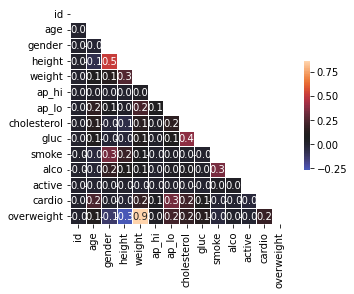

In [19]:
sns.heatmap(corr, linewidths=1, annot= True, square= True, mask= mask, fmt=".1f",
            center=0.08,cbar_kws= {"shrink":0.5})

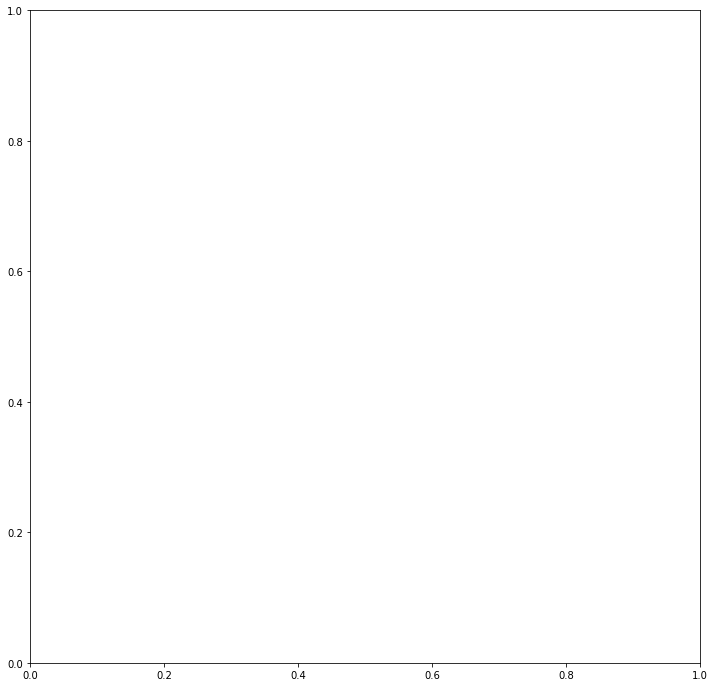

In [21]:
fig.savefig("heatmap.png")
fig